In [148]:
'''
install

pip install openmeteo-requests
pip install requests-cache retry-requests numpy pandas
'''
import openmeteo_requests

import requests_cache
import pandas as pd
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after=-1)
retry_session = retry(cache_session, retries=5, backoff_factor=0.2)
openmeteo = openmeteo_requests.Client(session=retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
    "latitude": 37.566,
    "longitude": 126.9784,
    "start_date": "2010-01-01",
    "end_date": "2019-12-31",
    "hourly": ["temperature_2m", "relative_humidity_2m", "dew_point_2m", "apparent_temperature", "precipitation",
               "rain", "snowfall", "snow_depth", "pressure_msl", "surface_pressure", "cloud_cover",
               "et0_fao_evapotranspiration", "vapour_pressure_deficit", "wind_speed_10m"]
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°E {response.Longitude()}°N")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
hourly_relative_humidity_2m = hourly.Variables(1).ValuesAsNumpy()
hourly_dew_point_2m = hourly.Variables(2).ValuesAsNumpy()
hourly_apparent_temperature = hourly.Variables(3).ValuesAsNumpy()
hourly_precipitation = hourly.Variables(4).ValuesAsNumpy()
hourly_rain = hourly.Variables(5).ValuesAsNumpy()
hourly_snowfall = hourly.Variables(6).ValuesAsNumpy()
hourly_snow_depth = hourly.Variables(7).ValuesAsNumpy()
hourly_pressure_msl = hourly.Variables(8).ValuesAsNumpy()
hourly_surface_pressure = hourly.Variables(9).ValuesAsNumpy()
hourly_cloud_cover = hourly.Variables(10).ValuesAsNumpy()
hourly_et0_fao_evapotranspiration = hourly.Variables(11).ValuesAsNumpy()
hourly_vapour_pressure_deficit = hourly.Variables(12).ValuesAsNumpy()
hourly_wind_speed_10m = hourly.Variables(13).ValuesAsNumpy()

# Create a dictionary to hold the hourly data
hourly_data = {
    "date": pd.date_range(start=pd.to_datetime(hourly.Time(), unit="s"),
                          end=pd.to_datetime(hourly.TimeEnd(), unit="s"),
                          freq=pd.Timedelta(seconds=hourly.Interval()), inclusive="left"),
    "temperature_2m": hourly_temperature_2m,
    "relative_humidity_2m": hourly_relative_humidity_2m,
    "dew_point_2m": hourly_dew_point_2m,
    "apparent_temperature": hourly_apparent_temperature,
    "precipitation": hourly_precipitation,
    "rain": hourly_rain,
    "snowfall": hourly_snowfall,
    "snow_depth": hourly_snow_depth,
    "pressure_msl": hourly_pressure_msl,
    "surface_pressure": hourly_surface_pressure,
    "cloud_cover": hourly_cloud_cover,
    "et0_fao_evapotranspiration": hourly_et0_fao_evapotranspiration,
    "vapour_pressure_deficit": hourly_vapour_pressure_deficit,
    "wind_speed_10m": hourly_wind_speed_10m
}

# Create a DataFrame from the hourly data dictionary
hourly_dataframe = pd.DataFrame(data=hourly_data)

# Write the DataFrame to a CSV file
hourly_dataframe.to_csv('hourly_weather_data.csv', index=False)

print("CSV file created successfully.")


Coordinates 37.57469177246094°E 126.95999908447266°N
Elevation 27.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
CSV file created successfully.


In [149]:
df = pd.read_csv('hourly_weather_data.csv') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87648 entries, 0 to 87647
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   date                        87648 non-null  object 
 1   temperature_2m              87648 non-null  float64
 2   relative_humidity_2m        87648 non-null  float64
 3   dew_point_2m                87648 non-null  float64
 4   apparent_temperature        87648 non-null  float64
 5   precipitation               87648 non-null  float64
 6   rain                        87648 non-null  float64
 7   snowfall                    87648 non-null  float64
 8   snow_depth                  87648 non-null  float64
 9   pressure_msl                87648 non-null  float64
 10  surface_pressure            87648 non-null  float64
 11  cloud_cover                 87648 non-null  float64
 12  et0_fao_evapotranspiration  87648 non-null  float64
 13  vapour_pressure_deficit     876

In [150]:
import pandas as pd

# CSV 파일에서 데이터를 읽어오기
df = pd.read_csv('hourly_weather_data.csv')

# 수치 데이터가 있는 열 선택
numeric_columns = ['temperature_2m', 'relative_humidity_2m', 'dew_point_2m', 'apparent_temperature', 
                   'precipitation', 'rain', 'snowfall', 'snow_depth', 'pressure_msl', 'surface_pressure',
                   'cloud_cover', 'et0_fao_evapotranspiration', 'vapour_pressure_deficit', 'wind_speed_10m']

# 소수점 한 자리로 반올림
df[numeric_columns] = df[numeric_columns].round(0)

# 수정된 데이터를 새로운 CSV 파일로 저장
df.to_csv('rounded_hourly_weather_data.csv', index=False)

print("Modified CSV file created successfully.")

Modified CSV file created successfully.


In [151]:
import pandas as pd

# Load the weather data CSV file into a pandas DataFrame
weather_data = pd.read_csv('filtered_hourly_weather_data.csv', encoding='cp1252')

# Extract only the first 8736 rows
extracted_weather_data = weather_data.iloc[:8736]

# Save the extracted data to a new CSV file
extracted_weather_data.to_csv('extracted_weather_data.csv', index=False)


In [152]:
df = pd.read_csv('extracted_weather_data.csv') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8736 entries, 0 to 8735
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   date                        8736 non-null   object 
 1   temperature_2m              8736 non-null   float64
 2   relative_humidity_2m        8736 non-null   float64
 3   dew_point_2m                8736 non-null   float64
 4   apparent_temperature        8736 non-null   float64
 5   precipitation               8736 non-null   float64
 6   rain                        8736 non-null   float64
 7   snowfall                    8736 non-null   float64
 8   snow_depth                  8736 non-null   float64
 9   pressure_msl                8736 non-null   float64
 10  surface_pressure            8736 non-null   float64
 11  cloud_cover                 8736 non-null   float64
 12  et0_fao_evapotranspiration  8736 non-null   float64
 13  vapour_pressure_deficit     8736 

In [153]:
import csv

# Open the CSV file with cp1252 encoding
with open('SeoulBikeData.csv', 'r', encoding='cp1252') as file:
    # Create a CSV reader object
    reader = csv.reader(file)
    
    # Iterate over each row in the CSV file
    for row in reader:
        # Do something with the row, for example, print it
        print(row)


['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day']
['01/12/2017', '254', '0', '-5.2', '37', '2.2', '2000', '-17.6', '0', '0', '0', 'Winter', 'No Holiday', 'Yes']
['01/12/2017', '204', '1', '-5.5', '38', '0.8', '2000', '-17.6', '0', '0', '0', 'Winter', 'No Holiday', 'Yes']
['01/12/2017', '173', '2', '-6', '39', '1', '2000', '-17.7', '0', '0', '0', 'Winter', 'No Holiday', 'Yes']
['01/12/2017', '107', '3', '-6.2', '40', '0.9', '2000', '-17.6', '0', '0', '0', 'Winter', 'No Holiday', 'Yes']
['01/12/2017', '78', '4', '-6', '36', '2.3', '2000', '-18.6', '0', '0', '0', 'Winter', 'No Holiday', 'Yes']
['01/12/2017', '100', '5', '-6.4', '37', '1.5', '2000', '-18.7', '0', '0', '0', 'Winter', 'No Holiday', 'Yes']
['01/12/2017', '181', '6', '-6.6', '35', '1.3', '2000', '-19.5', '0', '0', '0', 'Winter', 'No Holid

In [154]:
import pandas as pd

# Load both CSV files into pandas DataFrames with 'cp1252' encoding
bike_data = pd.read_csv('SeoulBikeData.csv', encoding='cp1252')
weather_data = pd.read_csv('filtered_hourly_weather_data.csv', encoding='cp1252')

# Inspect the column names of both DataFrames
print("Bike Data Columns:", bike_data.columns)
print("Weather Data Columns:", weather_data.columns)




Bike Data Columns: Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')
Weather Data Columns: Index(['date', 'temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'apparent_temperature', 'precipitation', 'rain', 'snowfall',
       'snow_depth', 'pressure_msl', 'surface_pressure', 'cloud_cover',
       'et0_fao_evapotranspiration', 'vapour_pressure_deficit',
       'wind_speed_10m'],
      dtype='object')


In [155]:
import pandas as pd

# Load the bike data CSV file into a pandas DataFrame
bike_data = pd.read_csv('SeoulBikeData.csv', encoding='cp1252')

# Extract the desired columns: 'Date', 'Rented Bike Count', 'Hour', 'Visibility (10m)', 'Seasons', 'Holiday', 'Functioning Day'
desired_columns = ['Date', 'Rented Bike Count', 'Hour', 'Visibility (10m)', 'Seasons', 'Holiday', 'Functioning Day']
extracted_data = bike_data[desired_columns]

# Extract only the first 8736 rows
extracted_data = extracted_data.iloc[:8736]

# Save the extracted data to a new CSV file
extracted_data.to_csv('extracted_bike_data.csv', index=False)



In [156]:
df = pd.read_csv('SeoulBikeData1.csv') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8736 entries, 0 to 8735
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8736 non-null   object 
 1   Rented Bike Count          8736 non-null   int64  
 2   Hour                       8736 non-null   int64  
 3   Temperature(°C)            8736 non-null   float64
 4   Humidity(%)                8736 non-null   int64  
 5   Wind speed (m/s)           8736 non-null   float64
 6   Visibility (10m)           8736 non-null   int64  
 7   Dew point temperature(°C)  8736 non-null   float64
 8   Solar Radiation (MJ/m2)    8736 non-null   float64
 9   Rainfall(mm)               8736 non-null   float64
 10  Snowfall (cm)              8736 non-null   float64
 11  Seasons                    8736 non-null   object 
 12  Holiday                    8736 non-null   object 
 13  Functioning Day            8736 non-null   objec

In [157]:
import pandas as pd

# Load the weather data CSV file into a pandas DataFrame
weather_data = pd.read_csv('extracted_weather_data.csv', encoding='cp1252')

# Drop the 'date' column
weather_data.drop(columns=['date'], inplace=True)

# Save the modified data to a new CSV file
weather_data.to_csv('extracted_weather_data_without_date.csv', index=False)



In [158]:
import pandas as pd

# Load the extracted bike data CSV file into a pandas DataFrame
bike_data = pd.read_csv('extracted_bike_data.csv')

# Load the extracted weather data (without 'date' column) CSV file into a pandas DataFrame
weather_data = pd.read_csv('extracted_weather_data_without_date.csv')

# Merge the two DataFrames based on their row indices
merged_data = pd.merge(bike_data, weather_data, left_index=True, right_index=True)

# Save the merged data to a new CSV file
merged_data.to_csv('merged_bike_and_weather_data.csv', index=False)


In [159]:
df = pd.read_csv('merged_bike_and_weather_data.csv') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8736 entries, 0 to 8735
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        8736 non-null   object 
 1   Rented Bike Count           8736 non-null   int64  
 2   Hour                        8736 non-null   int64  
 3   Visibility (10m)            8736 non-null   int64  
 4   Seasons                     8736 non-null   object 
 5   Holiday                     8736 non-null   object 
 6   Functioning Day             8736 non-null   object 
 7   temperature_2m              8736 non-null   float64
 8   relative_humidity_2m        8736 non-null   float64
 9   dew_point_2m                8736 non-null   float64
 10  apparent_temperature        8736 non-null   float64
 11  precipitation               8736 non-null   float64
 12  rain                        8736 non-null   float64
 13  snowfall                    8736 

In [160]:
# Check for duplicates
duplicate = df[df.duplicated(['Date'])]
print(len(duplicate))

8372


In [161]:
df.groupby(["Date", "Hour"]).size().shape

(8736,)

In [162]:
sns.set_theme(style="whitegrid")

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [164]:
#target varaible
targetValue = "Rented Bike Count"

Text(0.5, 0, 'Time')

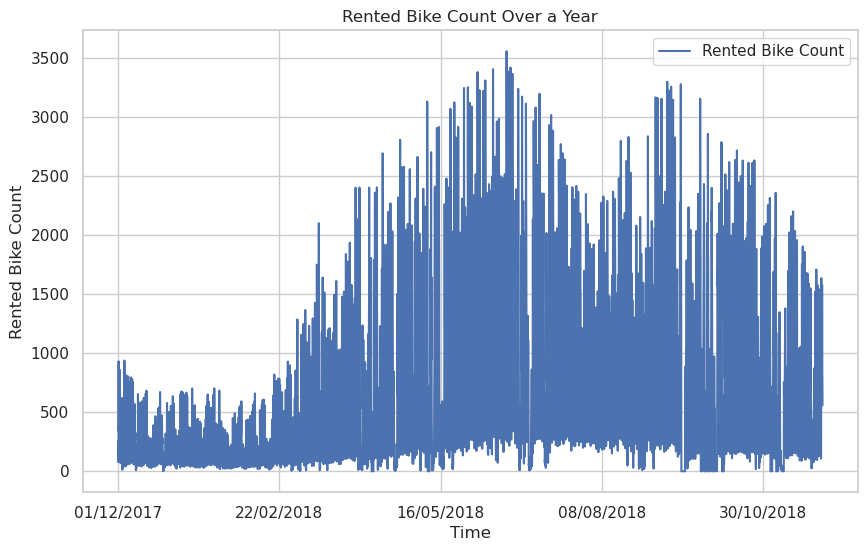

In [165]:
df.plot(x="Date", y=targetValue, figsize=(10, 6))
plt.title('Rented Bike Count Over a Year')  # Add title
plt.ylabel("Rented Bike Count")
plt.xlabel("Time")

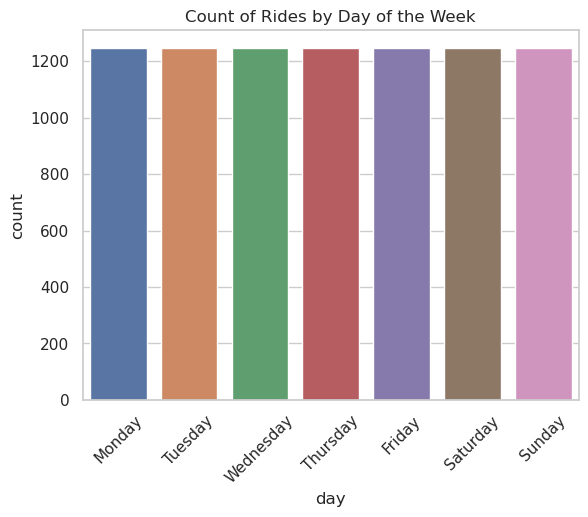

Friday       1248
Saturday     1248
Sunday       1248
Monday       1248
Tuesday      1248
Wednesday    1248
Thursday     1248
Name: day, dtype: int64

In [182]:
# Convert 'Date' column to datetime type with specified format
df["year"] = df.Date.dt.year.astype(int)
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Extract the day name and assign it to a new column 'day'
df["day"] = df['Date'].dt.day_name()

# Define the order of the days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plotting count of each day using seaborn countplot
sns.countplot(x="day", data=df, order=days_order)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set title
plt.title('Count of Rides by Day of the Week')

# Show plot
plt.show()

df.day.value_counts()

<AxesSubplot: title={'center': 'Count of Rides by the hour of the day'}, xlabel='Hour', ylabel='Rented Bike Count'>

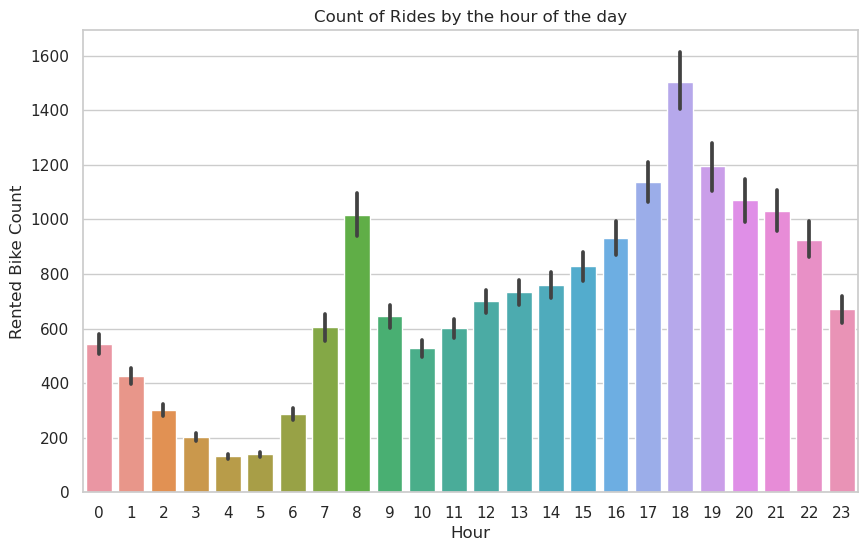

In [167]:
plt.figure(figsize=(10, 6))

# Set title
plt.title('Count of Rides by the hour of the day')

sns.barplot(data=df, x="Hour", y=tv)

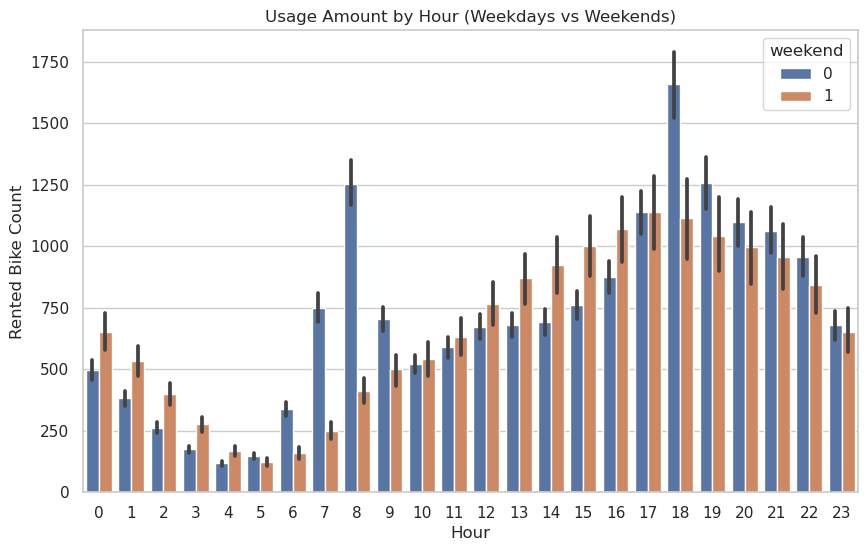

In [168]:
# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Extract the day of the week (Monday=0, Sunday=6)
df['day_of_week'] = df['Date'].dt.dayofweek

# Map day of week to weekday/weekend
df['weekend'] = df['day_of_week'].map(lambda x: 1 if x >= 5 else 0)

# Plotting usage amount by hour, distinguishing between weekdays and weekends
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Hour", y="Rented Bike Count", hue="weekend")

# Set title
plt.title('Usage Amount by Hour (Weekdays vs Weekends)')

# Show plot
plt.show()

<AxesSubplot: title={'center': 'Count of Rides by temperature'}, xlabel='temperature_2m', ylabel='Count'>

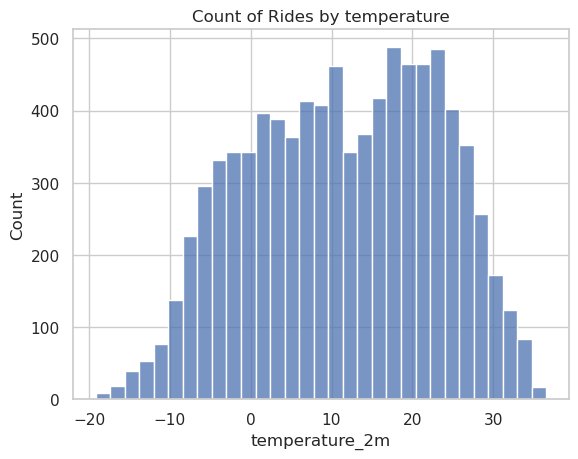

In [169]:
# Set title
plt.title('Count of Rides by temperature')
sns.histplot(data=df, x="temperature_2m")

<AxesSubplot: title={'center': 'Count of Rides by Temperature'}, xlabel='temperature_2m', ylabel='Rented Bike Count'>

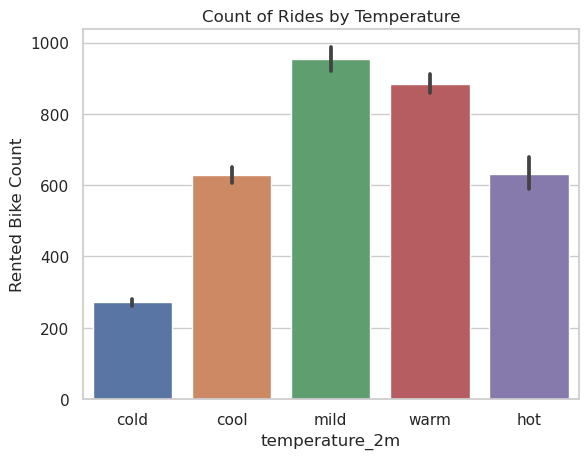

In [170]:
def plot_rating_with_condition(condition, bins, labels):
    df2 = df.copy()
    df2["new"] = pd.cut(df[condition], bins, labels=labels)
    y = sns.barplot(data=df2, x="new", y="Rented Bike Count")
    plt.ylabel("Rented Bike Count")
    plt.xlabel(condition)
    return y

t_bins = [-20, 0, 10, 20, 30, 40]
labels = ["cold", "cool", "mild", "warm", "hot"]
plt.title('Count of Rides by Temperature')
plot_rating_with_condition("temperature_2m", t_bins, labels)

<AxesSubplot: title={'center': 'Count of Rides by humidity'}, xlabel='relative_humidity_2m', ylabel='Count'>

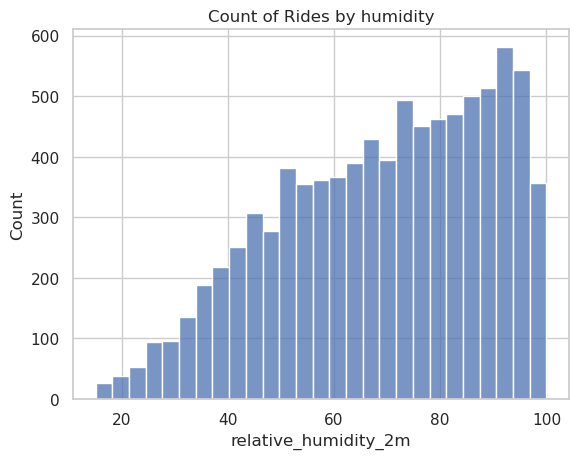

In [171]:
plt.title('Count of Rides by humidity')
sns.histplot(data=df, x="relative_humidity_2m")

<AxesSubplot: title={'center': 'Count of Rides by Humidity'}, xlabel='relative_humidity_2m', ylabel='Rented Bike Count'>

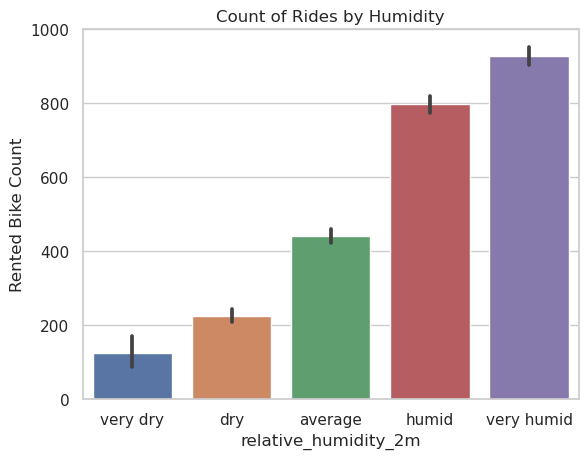

In [172]:
t_bins = [ 0, 20, 40, 60, 80, 100]
labels = ["very dry", "dry", "average", "humid", "very humid"]
    # Set title
plt.title('Count of Rides by Humidity')
plot_rating_with_condition("relative_humidity_2m", t_bins, labels)

0.0    7613
0.1     309
0.2     125
0.3      97
0.4      58
0.6      48
0.5      45
0.7      33
0.9      31
0.8      25
Name: precipitation, dtype: int64

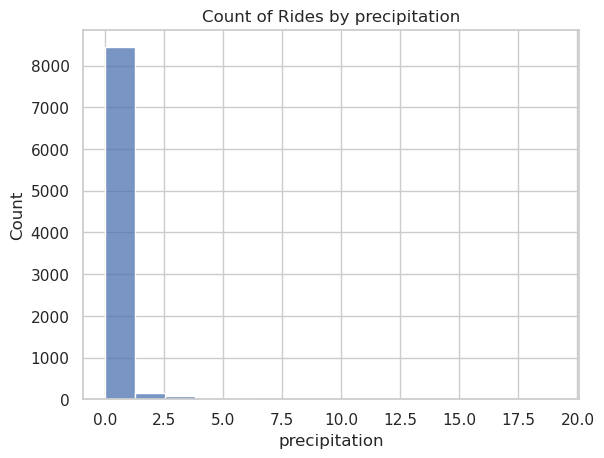

In [173]:
plt.title('Count of Rides by precipitation')
sns.histplot(data=df, x="precipitation")
df["precipitation"].value_counts().head(10)

<AxesSubplot: title={'center': 'Count of Rides by cloud cover'}, xlabel='cloud_cover', ylabel='Count'>

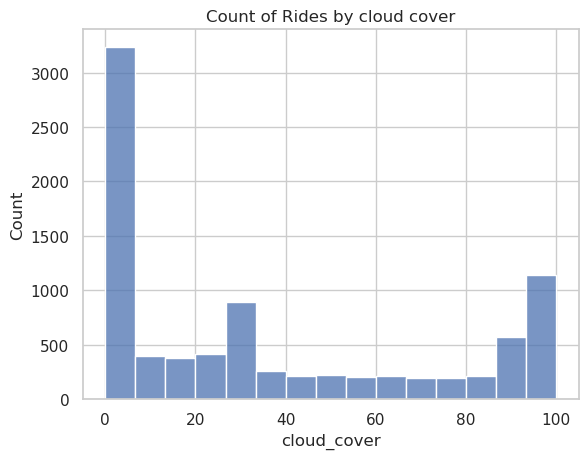

In [174]:
plt.title('Count of Rides by cloud cover')
sns.histplot(data=df, x="cloud_cover")

<AxesSubplot: title={'center': 'Count of Rides by wind speed'}, xlabel='wind_speed_10m', ylabel='Count'>

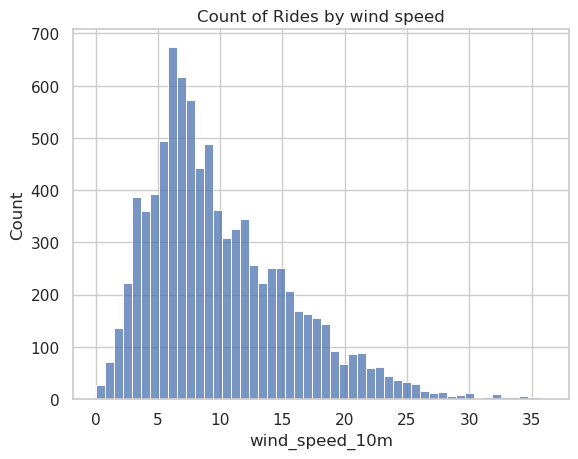

In [175]:
plt.title('Count of Rides by wind speed')
sns.histplot(data=df, x="wind_speed_10m")

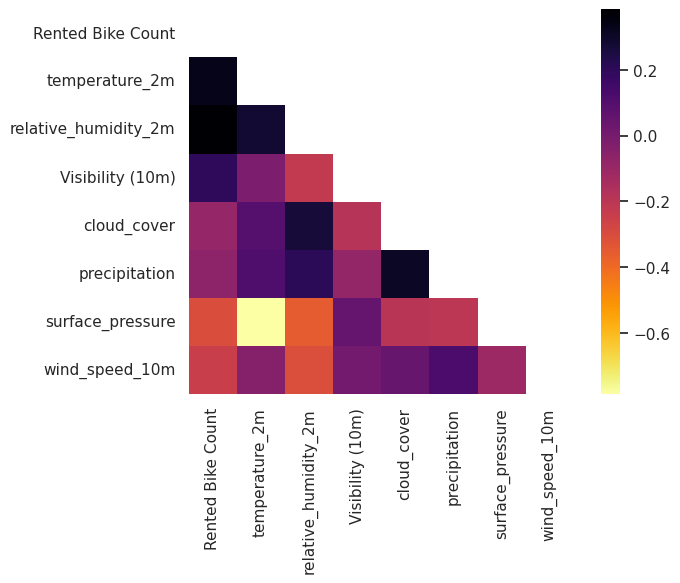

In [176]:
from pandas.plotting import scatter_matrix

weather_cols = ["Rented Bike Count",'temperature_2m', 'relative_humidity_2m', 'Visibility (10m)', 'cloud_cover',
        'precipitation', 'surface_pressure', 
       'wind_speed_10m']

df_weather = df[weather_cols]
df_weather.head()

corr = df_weather.corr(method='pearson')
mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, square=True, cmap="inferno_r")
#sns.heatmap(corr, cmap="inferno_r")

In [181]:
from pandas.plotting import scatter_matrix

weather_cols = ["Rented Bike Count", 'temperature_2m', 'relative_humidity_2m', 'Visibility (10m)', 'cloud_cover',
                'precipitation', 'surface_pressure', 'wind_speed_10m']

df_weather = df[weather_cols]

corr = df_weather.corr(method='pearson')
print(corr)


                      Rented Bike Count  temperature_2m  relative_humidity_2m  \
Rented Bike Count              1.000000        0.333084              0.384477   
temperature_2m                 0.333084        1.000000              0.279358   
relative_humidity_2m           0.384477        0.279358              1.000000   
Visibility (10m)               0.199226       -0.014650             -0.219882   
cloud_cover                   -0.089627        0.093863              0.269048   
precipitation                 -0.065899        0.111532              0.207289   
surface_pressure              -0.303206       -0.786005             -0.355718   
wind_speed_10m                -0.244570       -0.042141             -0.306138   

                      Visibility (10m)  cloud_cover  precipitation  \
Rented Bike Count             0.199226    -0.089627      -0.065899   
temperature_2m               -0.014650     0.093863       0.111532   
relative_humidity_2m         -0.219882     0.269048       0.

In [ ]:
import pandas as pd

# Replace 'your_file_path.csv' with the path to your CSV file
file_path = "서울특별시 공공자전거 신규가입자 정보(월별)_23.1-6.csv"

try:
    # Attempt to read the CSV file specifying the encoding as 'utf-8'
    df = pd.read_csv(file_path, encoding='utf-8')
    print("File loaded successfully.")
except Exception as e:
    print(f"File Load Error: {e}")
